In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


In [6]:
from sklearn.model_selection import train_test_split

In [12]:
X = load_boston().data
Y = load_boston().target
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [14]:
data=pd.DataFrame(x_train)
data['price']=y_train
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.965593,-0.507195,1.060995,-0.236801,1.605892,0.254422,0.938217,-0.879312,1.678968,1.554097,0.806164,-3.573022,1.577620,11.8
1,0.619917,-0.507195,1.060995,-0.236801,0.260231,-1.193514,0.960272,-0.668641,1.678968,1.554097,0.806164,-0.066774,0.758763,13.8
2,1.023246,-0.507195,1.060995,-0.236801,0.984818,-1.924498,1.129357,-1.267236,1.678968,1.554097,0.806164,0.435284,3.090542,13.8
3,-0.440956,-0.507195,-0.555266,-0.236801,-0.731762,0.201106,0.353772,0.540991,-0.863002,-0.974253,-0.287906,0.435284,-0.503174,21.6
4,-0.026531,-0.507195,1.060995,-0.236801,0.872680,-0.727705,-0.774684,-0.365101,1.678968,1.554097,0.806164,-0.272717,0.196500,19.9


In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)
print(x_train.shape)
print(x_test.shape)

(339, 13)
(167, 13)


In [16]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Linear regression with sklearn

In [17]:
clf = SGDRegressor()
clf.fit(x_train, y_train)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [35]:
clf.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
y_pred_1 = clf.predict(x_test)

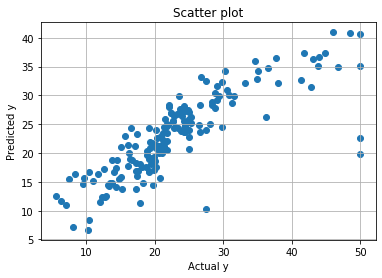

Mean Squared Error : 27.45543586819582


In [21]:
plt.scatter(y_test,y_pred_1)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_1))

Linear regression with custom SGD

In [25]:
#Code referred from https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1

def sgd(train_data,learning_rate,n_iter,k,divideby):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        # We keep our initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        # Incrementing the iteration value
        cur_iter=cur_iter+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/divideby
        
    return w,b #Returning the weights and Bias

In [23]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

learning_rate(r0)=1
n_iter=200
k(batch_size)=10
divideby=2

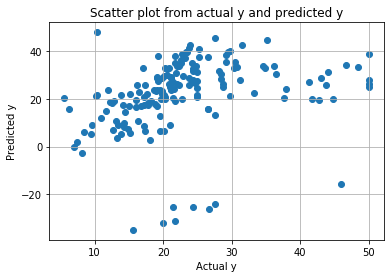

Mean Squared Error : 233.9796736260269


In [26]:
w,b=sgd(data,learning_rate=1,n_iter=200,divideby=2,k=10)
y_pred_2=predict(x_test,w,b)

plt.scatter(y_test,y_pred_2)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_2))

learning_rate(r0)=0.01
n_iter=1000
k(batch_size)=20
divideby=2

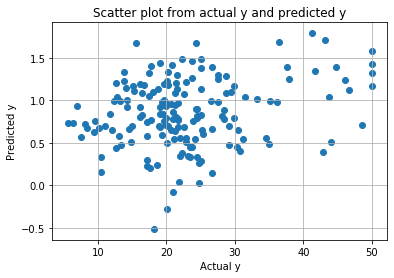

Mean Squared Error : 579.3591078471009


In [30]:
w,b=sgd(data,learning_rate=0.01,n_iter=1000,divideby=2,k=20)
y_pred_3=predict(x_test,w,b)

plt.scatter(y_test,y_pred_3)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_3))

learning_rate(r0)=0.001
n_iter=1500
k(batch_size)=10
divideby=1

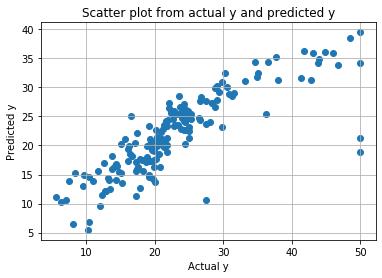

Mean Squared Error : 28.27203370743585


In [33]:
w,b=sgd(data,learning_rate=0.001,n_iter=1500,divideby=1,k=10)
y_pred_4=predict(x_test,w,b)

plt.scatter(y_test,y_pred_4)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_4))

In [37]:
x = PrettyTable()
x.field_names = ["Model", "Learning rate", "Iterations","MSE"]

x.add_row(["SGDregressor", 'invscaling',1000, 27.45])
x.add_row(["Custom SGD", 1,200, 233.97])
x.add_row(["Custom SGD", 0.01,1000,579.35])
x.add_row(["Custom SGD", 0.001,1500,28.27])

print (x)

+--------------+---------------+------------+--------+
|    Model     | Learning rate | Iterations |  MSE   |
+--------------+---------------+------------+--------+
| SGDregressor |   invscaling  |    1000    | 27.45  |
|  Custom SGD  |       1       |    200     | 233.97 |
|  Custom SGD  |      0.01     |    1000    | 579.35 |
|  Custom SGD  |     0.001     |    1500    | 28.27  |
+--------------+---------------+------------+--------+


SUMMARY :
1. We got an MSE of 27.45 with sklearn's SGDregressor.
2. With our custom SGD, we got similar results after changing the hyperparameters.